# Analyse Numerique 2

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider


In [2]:
#tout d'abord, la fonction à interpoler. ici, il s'agit de sinus sur [0,1].
def f(x):
    return math.sin(math.pi*x)

Ensuite on definie une fonction d'echantillonage  
Elle renvoie une liste de x et une liste de y

In [3]:
def echantillonage(fonction, début, fin, nombre_éléments):
    x = np.linspace(début, fin, nombre_éléments)  # Retourne des nombres régulièrement espacés sur un interval.
    return x, [fonction(i) for i in x]

In [4]:
echantillonage(f, 0, 1, 5)

(array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 [0.0, 0.7071067811865476, 1.0, 0.7071067811865476, 1.2246467991473532e-16])

Puis on definie une fonction qui trace une fonction selon quelques point echantillonés.  
Pourquoi?  
Par ce que si l'on veut tracer en interactif, if faut passer le nombre d'éléments en paramètre à la fonction de tracer.

In [5]:
def trace(f, mini, maxi, nombre_elements):
    x, y = echantillonage(f, mini, maxi, nombre_elements)
    plt.plot(x,y,'-o')
    plt.show()

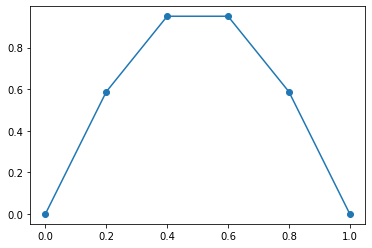

In [6]:
trace(f, 0, 1, 6)

Et en interactif  


In [7]:
interact(trace, f=fixed(f), mini=(0,0.5,0.1), maxi=fixed(1), nombre_elements=(1, 15, 1))

interactive(children=(FloatSlider(value=0.2, description='mini', max=0.5), IntSlider(value=8, description='nom…

<function __main__.trace(f, mini, maxi, nombre_elements)>

## La fonction d'interpolation de lagrange

On lui passe un echantillon de points et la valeur que l'on veut interpoller.

J'ai pris ton code pour la base mais j'ai du faire une erreur que je ne trouve pas.  
ici :
```
def interpolagrange(echantillon, x):
    n_echantillonage = len(echantillon)
    a, fa = echantillon
    interpol = 0
    for k in range(n_echantillonage):
        f=fa[k]
        for i in range(n_echantillonage):
            if i!=k:
                f=f*((x-a[i]) / (a[k]-a[i]))
        interpol=interpol+f
    return(interpol)
```

Du coup j'ai pris un autre chemin (pas meilleur)  

_Pour comprendre la fonction :_

**zip** 
```
zip([1, 2, 3, 4],['a','b','c','d']) --> [(1,'a'), (2,'b'), (3,'c'), (4,'d')]
```

**enumerate**
```
enumerate(['a','b','c','d']) --> [(1,'a'), (2,'b'), (3,'c'), (4,'d')]
```
Dans le principe car ça ne retourne pas des liste mais des iterateurs

In [8]:
def interpolagrange(echantillon, x):
    interpol = 0
    for k, elem in enumerate(zip(* echantillon)): # (1, (x1,y1)), (2, (x2,y2)) ... -> k l'index et elem le point (x,y)
        x_k, y_k = elem
        f = y_k
        for i, elem in enumerate(zip(* echantillon)):
            x_i, y_i = elem
            if i != k:
                f = f * ((x-x_i) / (x_k-x_i))
        interpol = interpol + f
    return(interpol)

## Un exemple
prenons un echantillon E

In [9]:
E = echantillonage(f, 0, 1, 5)

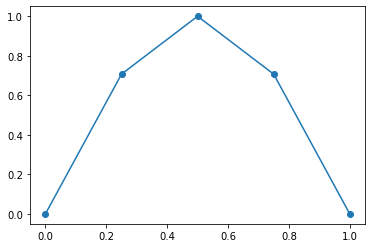

In [10]:
trace(f, 0, 1, 5)

Si on veut afficher les deux courbes (échantillonage + interpollation simultanément, il faut redéfinir une fonction trace

In [11]:
def trace_lagrange(fonction_ref, nombre_echantillon, debut, fin):
    
    echantillon = echantillonage(fonction_ref, debut, fin, nombre_echantillon)
    
    lagrange_x = np.linspace(debut, fin, 200)
    lagrange_y  = [interpolagrange(echantillon, x) for x in lagrange_x] 
    
    ref_x = np.linspace(debut, fin, 200)
    ref_y = [fonction_ref(x) for x in ref_x] 
    
    # on trace la fonction de référence
    plt.plot(ref_x,ref_y, color='orange')
    
    # on place les points d'échantillonage
    plt.plot(* echantillon,'o', color='orange')
    
    # on trace le lagrange à n échantillon
    plt.plot(lagrange_x,lagrange_y, color='blue')
    
    plt.show()

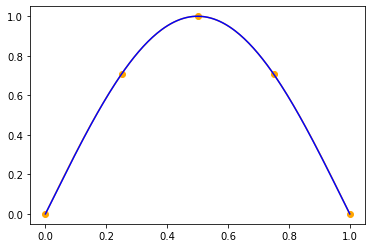

In [12]:
trace_lagrange(f,5,0,1)

.pour sin en 5 points c'est déjà très très proche.  
on ne voit pas la courbe de reference  
en interactif ça donne ça :

In [13]:
interact(trace_lagrange, fonction_ref=fixed(f), nombre_echantillon=(1,15), debut=(0,1,0.01), fin=(0.1,1,0.01))

interactive(children=(IntSlider(value=8, description='nombre_echantillon', max=15, min=1), FloatSlider(value=0…

<function __main__.trace_lagrange(fonction_ref, nombre_echantillon, debut, fin)>

In [14]:
# pour ln(x)

interact(trace_lagrange, 
         fonction_ref = fixed(math.log), 
         nombre_echantillon = IntSlider(value=4, max=20, min=2), 
         debut = FloatSlider(value=0.1, max=10, min=0.01),
         fin = FloatSlider(value=10.0, max=50, min=0.01)
        )

interactive(children=(IntSlider(value=4, description='nombre_echantillon', max=20, min=2), FloatSlider(value=0…

<function __main__.trace_lagrange(fonction_ref, nombre_echantillon, debut, fin)>

In [15]:
# pour x*sin(x)

interact(trace_lagrange, 
         fonction_ref = fixed(lambda x: math.sin(x)*x), 
         nombre_echantillon = IntSlider(value=6, max=20, min=2), 
         debut = FloatSlider(value=4, max=10, min=0.00),
         fin = FloatSlider(value=18.0, max=20, min=0.01)
        )

interactive(children=(IntSlider(value=6, description='nombre_echantillon', max=20, min=2), FloatSlider(value=4…

<function __main__.trace_lagrange(fonction_ref, nombre_echantillon, debut, fin)>

In [16]:
# pour x*sin(x)

interact(trace_lagrange, 
         fonction_ref = fixed(lambda x: 1/(x ** 2 - 25), 
         nombre_echantillon = IntSlider(value=6, max=20, min=2), 
         debut = FloatSlider(value=-1, max=1, min=-1),
         fin = FloatSlider(value=1, max=2, min=0.01)
        )

SyntaxError: unexpected EOF while parsing (<ipython-input-16-c8274f9f435f>, line 8)

fin